In [1]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
basedir = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/')

In [4]:
theory_path = basedir / 'CoLoRe_boxes' / '10x_DESI_box'
assert theory_path.is_dir()

theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=1,
    apply_lognormal=True)

In [5]:
def get_boxes(path, rsd=False, rmin=0.1, rmax=200, N_bins=41, zmin=0.8, zmax=0.9, nside=2):
    return FileFuncs.mix_sims(
        FileFuncs.get_full_path(path,
                                rsd=rsd, rsd2=None, 
                                rmin=rmin, rmax=rmax, N_bins=N_bins,
                                zmin=zmin, zmax=zmax, nside=2)
    )

2526771 2667946
0.8552310604780813


/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
No handles with labels found to put in legend.


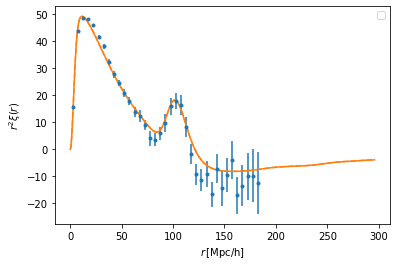

In [6]:
boxes = get_boxes(basedir / 'corrf' / 'high_3x2_600')
meandat = 0
meanrand= 0
for box in boxes:
    meandat+= box.sizes['Data']
    meanrand += box.sizes['Randoms']

print(meandat, meanrand)
z = theory.get_zeff(0.8, 0.9)
print(z)

fig, ax = plt.subplots()
pole=0

Plots.plot_data(pole, boxes, ax=ax)
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=False, bias=1.6)
ax.legend()